In [162]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV


In [143]:
dfnba = pd.read_csv('./dfnba.csv')
dfnba = dfnba.set_index('name-year',drop=True)
dfnba.head()

pos              name  weight height   Age     G    GS  \
name-year                                                                       
Anthony_Davis_2020     F-C     Anthony-Davis   253.0   6-10  26.0  62.0  62.0   
Hassan_Whiteside_2020    C  Hassan-Whiteside   265.0    7-0  30.0  67.0  61.0   
Montrezl_Harrell_2020  F-C  Montrezl-Harrell   240.0    6-7  26.0  63.0   2.0   
Danilo_Gallinari_2020    F  Danilo-Gallinari   233.0   6-10  31.0  62.0  62.0   
Fred_VanVleet_2020       G     Fred-VanVleet   197.0    6-1  25.0  54.0  54.0   

                         MP    FG%   3P  ...  AST  STL  BLK  TOV   PTS  USG%  \
name-year                                ...                                   
Anthony_Davis_2020     34.4  0.503  1.2  ...  3.2  1.5  2.3  2.5  26.1  29.3   
Hassan_Whiteside_2020  30.0  0.621  0.1  ...  1.2  0.4  2.9  1.8  15.5  19.6   
Montrezl_Harrell_2020  27.8  0.580  0.0  ...  1.7  0.6  1.1  1.7  18.6  25.7   
Danilo_Gallinari_2020  29.6  0.438  2.9  ...  1.9  0.7  0.1  1.2  18.7  24.6   
Fred_VanVleet_2020     35.7  0.413  2.7  ...  6.6  1.9  0.3  2.2  17.6  21.7   

                         TS%   Prev_Sal   Next_Sal  height_ft  
name-year                                                      
Anthony_Davis_2020     0.610  29.044193  32.742000   6.833333  
Hassan_Whiteside_2020  0.644  29.044192   2.320044   7.000000  
Montrezl_Harrell_2020  0.607   6.432106   9.258000   6.583333  
Danilo_Gallinari_2020  0.612  24.244277  19.500000   6.833333  
Fred_VanVleet_2020     0.553  10.019240  21.250000   6.083333  

[5 rows x 25 columns]

In [144]:
dfnba = dfnba.drop(columns=['pos','name','height'])
dfnba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, Anthony_Davis_2020 to Mike_Scott_2017
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   weight     381 non-null    float64
 1   Age        381 non-null    float64
 2   G          381 non-null    float64
 3   GS         381 non-null    float64
 4   MP         381 non-null    float64
 5   FG%        381 non-null    float64
 6   3P         381 non-null    float64
 7   3P%        381 non-null    float64
 8   FT         381 non-null    float64
 9   FT%        381 non-null    float64
 10  ORB        381 non-null    float64
 11  TRB        381 non-null    float64
 12  AST        381 non-null    float64
 13  STL        381 non-null    float64
 14  BLK        381 non-null    float64
 15  TOV        381 non-null    float64
 16  PTS        381 non-null    float64
 17  USG%       381 non-null    float64
 18  TS%        381 non-null    float64
 19  Prev_Sal   381 non-null   

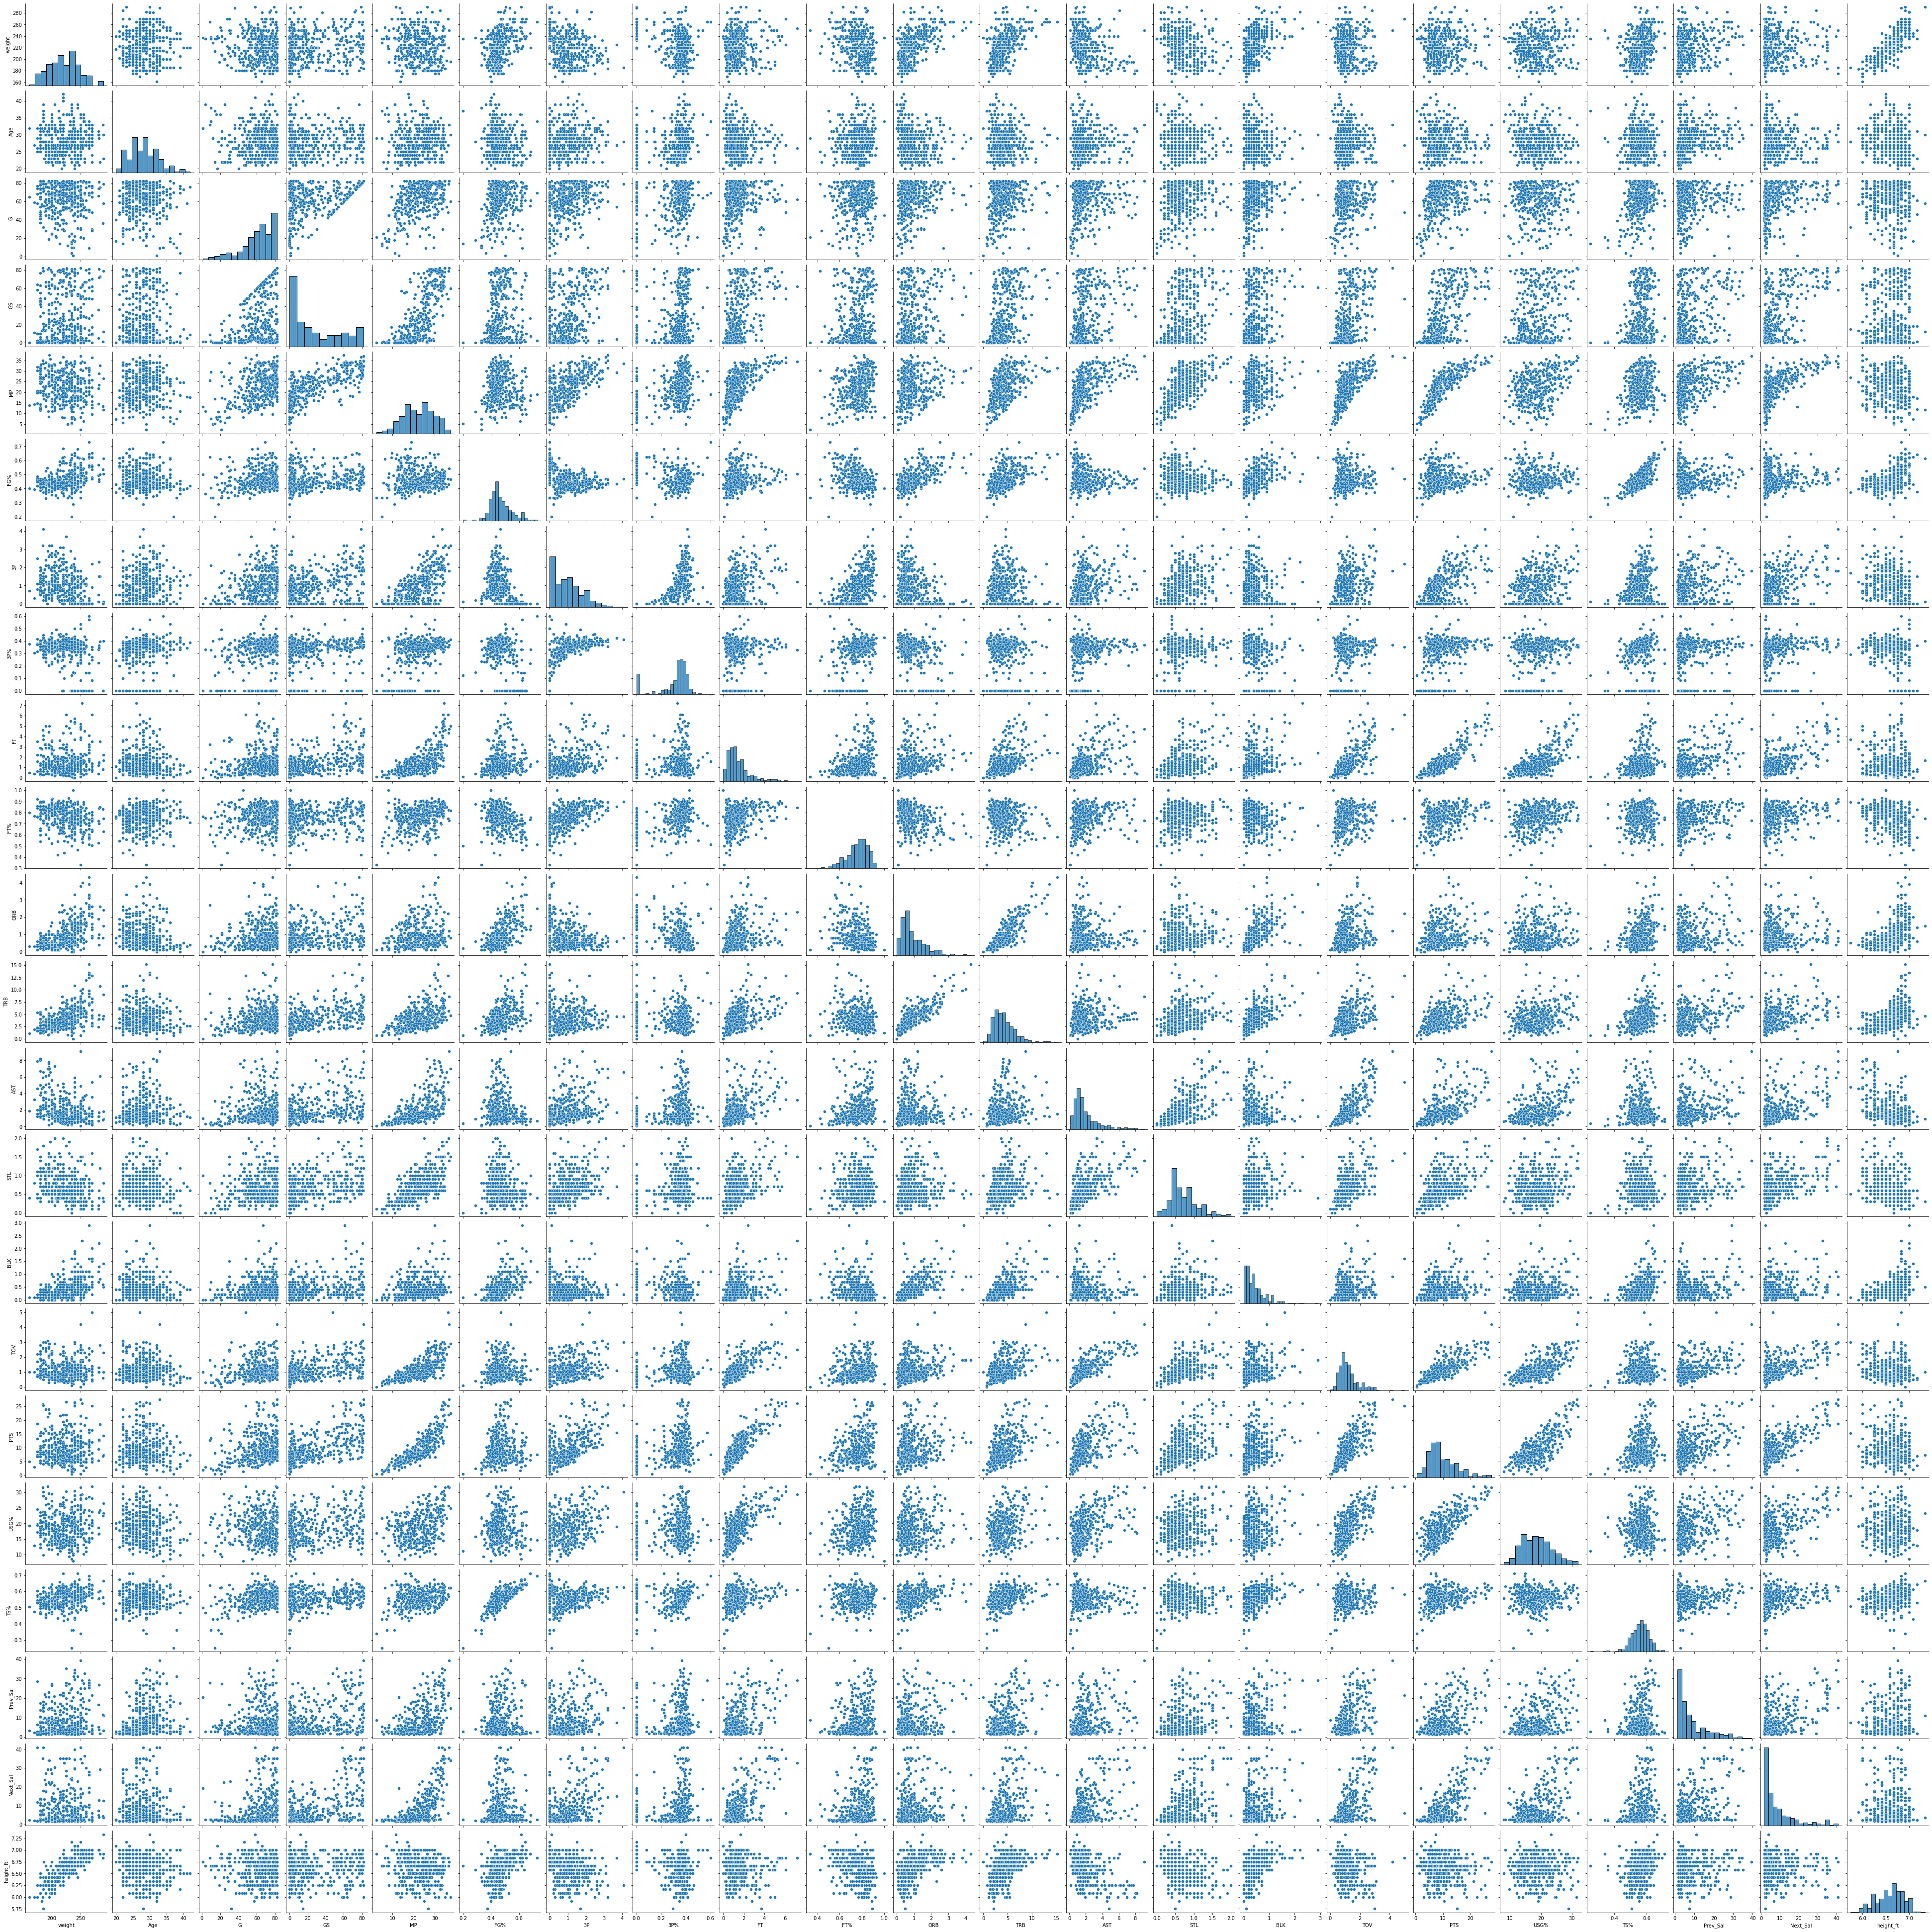

In [145]:
sns.pairplot(dfnba);

In [147]:
dfnba.columns

Index(['weight', 'Age', 'G', 'GS', 'MP', 'FG%', '3P', '3P%', 'FT', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'USG%', 'TS%',
       'Prev_Sal', 'Next_Sal', 'height_ft'],
      dtype='object')

In [15]:
# # Split into train, val, and test
# feats = ['weight', 'Age', 'G', 'GS', 'MP', 'FG%', '3P', '3P%', 'FT', 'FT%',
#        'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'USG%', 'TS%',
#        'Prev_Sal', 'height_ft']

# X_train, X_test, y_train, y_test = train_test_split(df[feats], 
#                                         df['Next_Sal'], test_size=0.2, random_state=1)

# lr = LinearRegression()
# lr.fit(X_train,y_train)
# print('train r2', lr.score(X_train,y_train))
# print('test r2', lr.score(X_test,y_test))

train r2 0.7210854231520033
test r2 0.5942177205030408


/Users/andrei/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Next_Sal', ylabel='Next_Sal'>

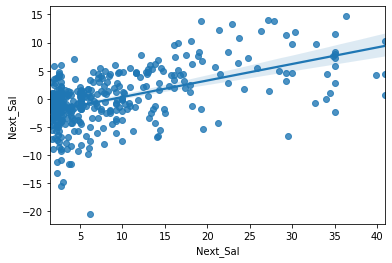

In [21]:
# sns.regplot(df['Next_Sal'], df['Next_Sal'] - lr.predict(df[feats]))


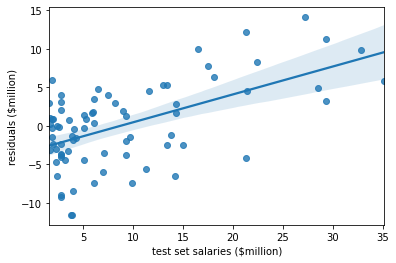

In [23]:
# x, y = pd.Series(y_test, name="test set salaries ($million)"), pd.Series(y_test - test_set_pred, name="residuals ($million)")
# ax = sns.regplot(x=x, y=y)
# # sns_plot.savefig('figggg',bbox_inches="tight")



In [148]:
dfnba.corr()

weight       Age         G        GS        MP       FG%  \
weight     1.000000  0.044749 -0.050631  0.101806 -0.094000  0.453159   
Age        0.044749  1.000000  0.010680  0.016553  0.013511 -0.117168   
G         -0.050631  0.010680  1.000000  0.416108  0.438801  0.213444   
GS         0.101806  0.016553  0.416108  1.000000  0.732176  0.133000   
MP        -0.094000  0.013511  0.438801  0.732176  1.000000 -0.002880   
FG%        0.453159 -0.117168  0.213444  0.133000 -0.002880  1.000000   
3P        -0.315639  0.102203  0.237302  0.376762  0.626337 -0.411225   
3P%       -0.322361  0.107302  0.208866  0.164503  0.360652 -0.366060   
FT         0.088863 -0.071375  0.181882  0.489697  0.674641  0.133052   
FT%       -0.287752  0.099881  0.146198  0.157650  0.296526 -0.315815   
ORB        0.570060 -0.145070  0.181096  0.271550  0.188501  0.631667   
TRB        0.539476 -0.075779  0.243612  0.490400  0.492502  0.492320   
AST       -0.309461  0.004111  0.143610  0.396663  0.586637 -0.113765   
STL       -0.273419 -0.077657  0.226702  0.453679  0.657985 -0.079944   
BLK        0.524823 -0.087633  0.197439  0.282513  0.221107  0.537257   
TOV       -0.001747 -0.061348  0.158255  0.485532  0.692161  0.081948   
PTS        0.023597 -0.050543  0.301826  0.625448  0.844807  0.095315   
USG%       0.042853 -0.127042  0.009330  0.249555  0.408631 -0.013055   
TS%        0.268529 -0.018923  0.381540  0.241142  0.238574  0.782779   
Prev_Sal   0.167880  0.292471  0.085550  0.423044  0.505314  0.078301   
Next_Sal   0.009130 -0.048838  0.278714  0.598232  0.683007  0.090969   
height_ft  0.815347 -0.060262 -0.030089  0.051344 -0.175666  0.490566   

                 3P       3P%        FT       FT%  ...       AST       STL  \
weight    -0.315639 -0.322361  0.088863 -0.287752  ... -0.309461 -0.273419   
Age        0.102203  0.107302 -0.071375  0.099881  ...  0.004111 -0.077657   
G          0.237302  0.208866  0.181882  0.146198  ...  0.143610  0.226702   
GS         0.376762  0.164503  0.489697  0.157650  ...  0.396663  0.453679   
MP         0.626337  0.360652  0.674641  0.296526  ...  0.586637  0.657985   
FG%       -0.411225 -0.366060  0.133052 -0.315815  ... -0.113765 -0.079944   
3P         1.000000  0.589387  0.371631  0.522329  ...  0.344953  0.372421   
3P%        0.589387  1.000000  0.128604  0.404596  ...  0.209768  0.184809   
FT         0.371631  0.128604  1.000000  0.303362  ...  0.504887  0.426544   
FT%        0.522329  0.404596  0.303362  1.000000  ...  0.193599  0.152555   
ORB       -0.392882 -0.347558  0.247456 -0.351282  ... -0.078327  0.034166   
TRB       -0.070947 -0.146262  0.498979 -0.164707  ...  0.155315  0.237830   
AST        0.344953  0.209768  0.504887  0.193599  ...  1.000000  0.596395   
STL        0.372421  0.184809  0.426544  0.152555  ...  0.596395  1.000000   
BLK       -0.183866 -0.213273  0.308672 -0.203626  ... -0.026254  0.085269   
TOV        0.313552  0.130727  0.737461  0.147982  ...  0.784308  0.542742   
PTS        0.613814  0.291157  0.875815  0.342174  ...  0.570623  0.507386   
USG%       0.349709  0.132408  0.708470  0.252078  ...  0.445605  0.232928   
TS%        0.096159  0.063067  0.290949  0.100595  ... -0.045814  0.019527   
Prev_Sal   0.242920  0.077760  0.526808  0.151583  ...  0.371548  0.269251   
Next_Sal   0.499817  0.194587  0.677218  0.251270  ...  0.541440  0.497225   
height_ft -0.321474 -0.335696  0.011470 -0.301763  ... -0.443071 -0.280188   

                BLK       TOV       PTS      USG%       TS%  Prev_Sal  \
weight     0.524823 -0.001747  0.023597  0.042853  0.268529  0.167880   
Age       -0.087633 -0.061348 -0.050543 -0.127042 -0.018923  0.292471   
G          0.197439  0.158255  0.301826  0.009330  0.381540  0.085550   
GS         0.282513  0.485532  0.625448  0.249555  0.241142  0.423044   
MP         0.221107  0.692161  0.844807  0.408631  0.238574  0.505314   
FG%        0.537257  0.081948  0.095315 -0.013055  0.782779  0.078301   
3P        -0.183866  0.3135

In [149]:
dfnba.corr()['Next_Sal'].sort_values(ascending=False)
dfnba

weight   Age     G    GS    MP    FG%   3P  \
name-year                                                                  
Anthony_Davis_2020             253.0  26.0  62.0  62.0  34.4  0.503  1.2   
Hassan_Whiteside_2020          265.0  30.0  67.0  61.0  30.0  0.621  0.1   
Montrezl_Harrell_2020          240.0  26.0  63.0   2.0  27.8  0.580  0.0   
Danilo_Gallinari_2020          233.0  31.0  62.0  62.0  29.6  0.438  2.9   
Fred_VanVleet_2020             197.0  25.0  54.0  54.0  35.7  0.413  2.7   
...                              ...   ...   ...   ...   ...    ...  ...   
Michael_Carter-Williams_2017   190.0  25.0  45.0  19.0  18.8  0.366  0.3   
Udonis_Haslem_2017             235.0  36.0  16.0   0.0   8.1  0.478  0.0   
Jordan_Mickey_2017             235.0  22.0  25.0   1.0   5.6  0.441  0.0   
Paul_Pierce_2017               235.0  39.0  25.0   7.0  11.1  0.400  0.6   
Mike_Scott_2017                237.0  28.0  18.0   0.0  10.8  0.288  0.2   

                                3P%   FT    FT%  ...  AST  STL  BLK  TOV  \
name-year                                        ...                       
Anthony_Davis_2020            0.330  7.2  0.846  ...  3.2  1.5  2.3  2.5   
Hassan_Whiteside_2020         0.571  2.4  0.686  ...  1.2  0.4  2.9  1.8   
Montrezl_Harrell_2020         0.000  3.7  0.658  ...  1.7  0.6  1.1  1.7   
Danilo_Gallinari_2020         0.405  4.3  0.893  ...  1.9  0.7  0.1  1.2   
Fred_VanVleet_2020            0.390  3.1  0.848  ...  6.6  1.9  0.3  2.2   
...                             ...  ...    ...  ...  ...  ...  ...  ...   
Michael_Carter-Williams_2017  0.234  1.3  0.753  ...  2.5  0.8  0.5  1.5   
Udonis_Haslem_2017            0.000  0.6  0.600  ...  0.4  0.4  0.1  0.5   
Jordan_Mickey_2017            0.000  0.3  0.571  ...  0.3  0.1  0.2  0.4   
Paul_Pierce_2017              0.349  0.4  0.769  ...  0.4  0.2  0.2  0.6   
Mike_Scott_2017               0.148  0.4  0.875  ...  0.9  0.2  0.2  0.4   

                               PTS  USG%    TS%   Prev_Sal   Next_Sal  \
name-year                                                               
Anthony_Davis_2020            26.1  29.3  0.610  29.044193  32.742000   
Hassan_Whiteside_2020         15.5  19.6  0.644  29.044192   2.320044   
Montrezl_Harrell_2020         18.6  25.7  0.607   6.432106   9.258000   
Danilo_Gallinari_2020         18.7  24.6  0.612  24.244277  19.500000   
Fred_VanVleet_2020            17.6  21.7  0.553  10.019240  21.250000   
...                            ...   ...    ...        ...        ...   
Michael_Carter-Williams_2017   6.6  20.9  0.437   3.956455   3.187914   
Udonis_Haslem_2017             1.9  12.8  0.524   4.971161   2.749460   
Jordan_Mickey_2017             1.5  15.5  0.473   1.520744   1.737274   
Paul_Pierce_2017               3.2  14.8  0.535   4.384464   4.344820   
Mike_Scott_2017                2.5  15.8  0.360   4.142634   2.018467   

                              height_ft  
name-year                                
Anthony_Davis_2020             6.833333  
Hassan_Whiteside_2020          7.000000  
Montrezl_Harrell_2020          6.583333  
Danilo_Gallinari_2020          6.833333  
Fred_VanVleet_2020             6.083333  
...                                 ...  
Michael_Carter-Williams_2017   6.416667  
Udonis_Haslem_2017             6.666667  
Jordan_Mickey_2017             6.666667  
Paul_Pierce_2017               6.583333  
Mike_Scott_2017                6.583333  

[381 rows x 22 columns]

In [36]:
# df_small = dfnba[['Next_Sal','ORB','TRB']]

df_small = df[['Next_Sal', 'Prev_Sal', 'Age','G','GS','MP', '3P','3P%','FT','FT%', 'TRB', 'AST','STL','BLK','TOV','PTS','USG%']]
df_small.corr()



Next_Sal  Prev_Sal       Age         G        GS        MP  \
Next_Sal  1.000000  0.515669 -0.048838  0.278714  0.598232  0.683007   
Prev_Sal  0.515669  1.000000  0.292471  0.085550  0.423044  0.505314   
Age      -0.048838  0.292471  1.000000  0.010680  0.016553  0.013511   
G         0.278714  0.085550  0.010680  1.000000  0.416108  0.438801   
GS        0.598232  0.423044  0.016553  0.416108  1.000000  0.732176   
MP        0.683007  0.505314  0.013511  0.438801  0.732176  1.000000   
3P        0.499817  0.242920  0.102203  0.237302  0.376762  0.626337   
3P%       0.194587  0.077760  0.107302  0.208866  0.164503  0.360652   
FT        0.677218  0.526808 -0.071375  0.181882  0.489697  0.674641   
FT%       0.251270  0.151583  0.099881  0.146198  0.157650  0.296526   
TRB       0.406943  0.415460 -0.075779  0.243612  0.490400  0.492502   
AST       0.541440  0.371548  0.004111  0.143610  0.396663  0.586637   
STL       0.497225  0.269251 -0.077657  0.226702  0.453679  0.657985   
BLK       0.210890  0.233087 -0.087633  0.197439  0.282513  0.221107   
TOV       0.585999  0.496130 -0.061348  0.158255  0.485532  0.692161   
PTS       0.773236  0.549789 -0.050543  0.301826  0.625448  0.844807   
USG%      0.493666  0.362642 -0.127042  0.009330  0.249555  0.408631   

                3P       3P%        FT       FT%       TRB       AST  \
Next_Sal  0.499817  0.194587  0.677218  0.251270  0.406943  0.541440   
Prev_Sal  0.242920  0.077760  0.526808  0.151583  0.415460  0.371548   
Age       0.102203  0.107302 -0.071375  0.099881 -0.075779  0.004111   
G         0.237302  0.208866  0.181882  0.146198  0.243612  0.143610   
GS        0.376762  0.164503  0.489697  0.157650  0.490400  0.396663   
MP        0.626337  0.360652  0.674641  0.296526  0.492502  0.586637   
3P        1.000000  0.589387  0.371631  0.522329 -0.070947  0.344953   
3P%       0.589387  1.000000  0.128604  0.404596 -0.146262  0.209768   
FT        0.371631  0.128604  1.000000  0.303362  0.498979  0.504887   
FT%       0.522329  0.404596  0.303362  1.000000 -0.164707  0.193599   
TRB      -0.070947 -0.146262  0.498979 -0.164707  1.000000  0.155315   
AST       0.344953  0.209768  0.504887  0.193599  0.155315  1.000000   
STL       0.372421  0.184809  0.426544  0.152555  0.237830  0.596395   
BLK      -0.183866 -0.213273  0.308672 -0.203626  0.658420 -0.026254   
TOV       0.313552  0.130727  0.737461  0.147982  0.495443  0.784308   
PTS       0.613814  0.291157  0.875815  0.342174  0.501956  0.570623   
USG%      0.349709  0.132408  0.708470  0.252078  0.282841  0.445605   

               STL       BLK       TOV       PTS      USG%  
Next_Sal  0.497225  0.210890  0.585999  0.773236  0.493666  
Prev_Sal  0.269251  0.233087  0.496130  0.549789  0.362642  
Age      -0.077657 -0.087633 -0.061348 -0.050543 -0.127042  
G         0.226702  0.197439  0.158255  0.301826  0.009330  
GS        0.453679  0.282513  0.485532  0.625448  0.249555  
MP        0.657985  0.221107  0.692161  0.844807  0.408631  
3P        0.372421 -0.183866  0.313552  0.613814  0.349709  
3P%       0.184809 -0.213273  0.130727  0.291157  0.132408  
FT        0.426544  0.308672  0.737461  0.875815  0.708470  
FT%       0.152555 -0.203626  0.147982  0.342174  0.252078  
TRB       0.237830  0.658420  0.495443  0.501956  0.282841  
AST       0.596395 -0.026254  0.784308  0.570623  0.445605  
STL       1.000000  0.085269  0.542742  0.507386  0.232928  
BLK       0.085269  1.000000  0.255915  0.285684  0.150831  
TOV       0.542742  0.255915  1.000000  0.780852  0.689823  
PTS       0.507386  0.285684  0.780852  1.000000  0.769624  
USG%      0.232928  0.150831  0.689823  0.769624  1.000000

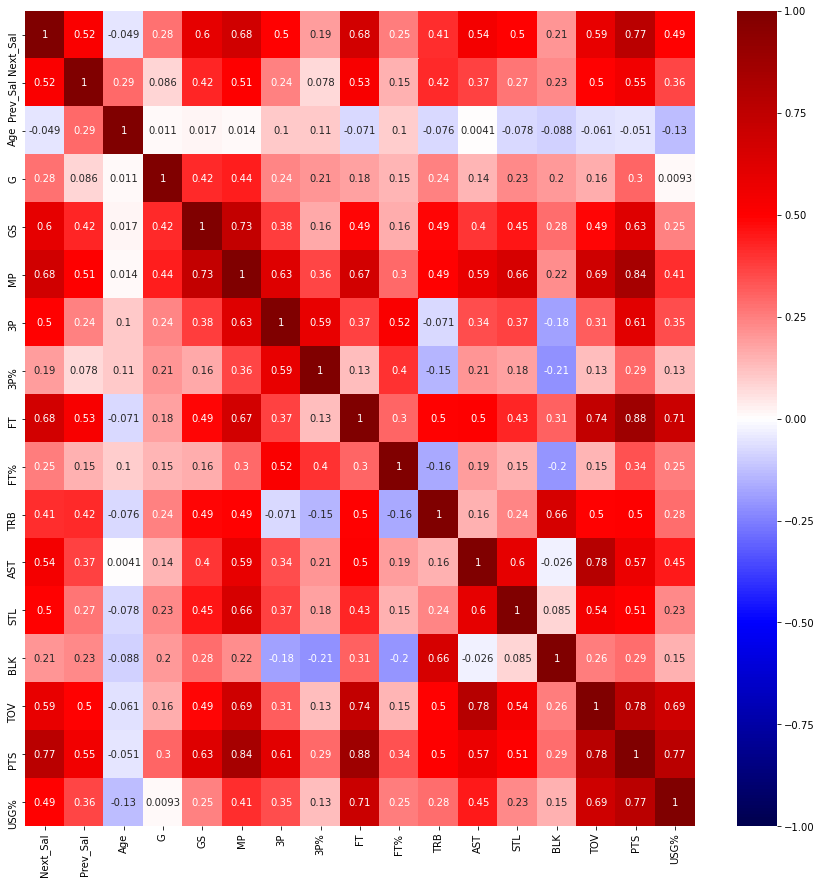

In [37]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_small.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [44]:
# Split into train, val, and test
all_feats = ['weight', 'Age', 'G', 'GS', 'MP', 'FG%', '3P', '3P%', 'FT', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'USG%', 'TS%',
       'Prev_Sal', 'height_ft']

feats = ['Prev_Sal','Age', 'G','GS','MP', '3P','3P%','FT', 'TRB', 'AST', 'TOV','PTS','USG%']

X, X_test, y, y_test = train_test_split(df[feats], df['Next_Sal'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [45]:
import statsmodels.api as sm
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Next_Sal   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     47.97
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           2.04e-64
Time:                        08:53:49   Log-Likelihood:                -914.00
No. Observations:                 304   AIC:                             1856.
Df Residuals:                     290   BIC:                             1908.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2744      3.913      1.859      0.064      -0.428      14.976
Prev_Sal       0.1106      0.051      2.174      0.031       0.010       0.211
Age           -0.1245      0.079     -1.585      0.114      -0.279       0.030
G              0.0179      0.019      0.929      0.354      -0.020       0.056
GS             0.0593      0.017      3.546      0.000       0.026       0.092
MP            -0.4276      0.133     -3.225      0.001      -0.689      -0.167
3P             1.9666      0.762      2.581      0.010       0.467       3.466
3P%           -4.1251      2.866     -1.439      0.151      -9.766       1.515
FT             0.8582      0.610      1.407      0.160      -0.342       2.058
TRB            0.4781      0.221      2.166      0.031       0.044       0.912
AST            2.2265      0.339      6.562      0.000       1.559       2.894
TOV           -4.7176      1.154     -4.087      0.000      -6.990      -2.446
PTS            1.3821      0.318      4.349      0.000       0.757       2.008
USG%          -0.2978      0.160     -1.857      0.064      -0.613       0.018
==============================================================================
Omnibus:                        9.686   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               17.944
Skew:                           0.073   Prob(JB):                     0.000127
Kurtosis:                       4.181   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
dfnba['GS/G'] = dfnba['GS']/dfnba['G']
dfnba['TOV/AST'] = dfnba['TOV']/dfnba['AST']
dfnba['3P%x3P'] = dfnba['3P%']*dfnba['3P']
dfnba['MP_sq'] = dfnba['MP']**2
dfnba['PTS_sq'] = dfnba['PTS']**2

# Split into train, val, and test
new_feats = ['GS/G', 'TOV/AST', '3P%x3P','MP_sq','PTS_sq']
old_feats = ['weight', 'Age', 'G', 'GS', 'MP', 'FG%', '3P', '3P%', 'FT', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'USG%', 'TS%',
       'Prev_Sal', 'height_ft']

feats = ['Prev_Sal','Age', 'G','GS','MP', '3P','3P%','FT', 'TRB', 'AST', 'TOV','PTS','USG%']
feats = feats + new_feats

X, X_test, y, y_test = train_test_split(dfnba[feats], dfnba['Next_Sal'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [156]:
dfnba[feats].describe()

Prev_Sal         Age           G          GS          MP          3P  \
count  381.000000  381.000000  381.000000  381.000000  381.000000  381.000000   
mean     8.604820   28.175853   61.131234   28.325459   22.304462    1.013911   
std      7.924012    4.144501   17.253790   27.165169    7.063521    0.816147   
min      1.218470   20.000000    1.000000    0.000000    2.300000    0.000000   
25%      2.749460   25.000000   52.000000    4.000000   17.400000    0.300000   
50%      5.358080   28.000000   65.000000   18.000000   22.300000    0.900000   
75%     11.585491   31.000000   75.000000   53.000000   27.300000    1.500000   
max     39.300737   42.000000   82.000000   82.000000   37.400000    4.100000   

              3P%          FT         TRB         AST         TOV         PTS  \
count  381.000000  381.000000  381.000000  381.000000  381.000000  381.000000   
mean     0.312126    1.514698    4.249606    2.044882    1.200787    9.833071   
std      0.124353    1.183035    2.289353    1.620756    0.675375    5.218722   
min      0.000000    0.000000    0.000000    0.100000    0.000000    0.600000   
25%      0.293000    0.700000    2.600000    1.000000    0.800000    6.100000   
50%      0.350000    1.200000    3.800000    1.500000    1.000000    8.500000   
75%      0.386000    1.900000    5.400000    2.500000    1.500000   12.600000   
max      0.600000    7.200000   15.200000    9.100000    5.000000   27.500000   

             USG%        GS/G     TOV/AST      3P%x3P        MP_sq      PTS_sq  
count  381.000000  381.000000  381.000000  381.000000   381.000000  381.000000  
mean    18.668766    0.440246    0.739768    0.376128   547.251391  123.852861  
std      4.810607    0.387150    0.416485    0.325399   313.755153  136.283106  
min      8.000000    0.000000    0.000000    0.000000     5.290000    0.360000  
25%     14.800000    0.066667    0.470588    0.099900   302.760000   37.210000  
50%     18.300000    0.305085    0.631579    0.326000   497.290000   72.250000  
75%     21.900000    0.910256    0.900000    0.555800   745.290000  158.760000  
max     31.900000    1.000000    4.500000    1.685100  1398.760000  756.250000

In [157]:
smmodel = sm.OLS(y, sm.add_constant(X)) 
fit = smmodel.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Next_Sal   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     40.58
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           9.30e-68
Time:                        10:08:01   Log-Likelihood:                -895.32
No. Observations:                 304   AIC:                             1829.
Df Residuals:                     285   BIC:                             1899.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5048      4.707      1.594      0.112      -1.760      16.769
Prev_Sal       0.0882      0.049      1.818      0.070      -0.007       0.184
Age           -0.1479      0.075     -1.963      0.051      -0.296       0.000
G              0.0027      0.028      0.099      0.921      -0.052       0.057
GS             0.1396      0.047      2.973      0.003       0.047       0.232
MP            -0.5393      0.388     -1.390      0.166      -1.303       0.224
3P            -7.3620      3.058     -2.407      0.017     -13.382      -1.342
3P%           -2.5029      2.815     -0.889      0.375      -8.045       3.039
FT             0.4963      0.595      0.835      0.405      -0.674       1.667
TRB            0.5327      0.211      2.527      0.012       0.118       0.948
AST            2.2891      0.405      5.658      0.000       1.493       3.085
TOV           -5.6047      1.206     -4.649      0.000      -7.978      -3.232
PTS            0.0808      0.616      0.131      0.896      -1.132       1.294
USG%           0.0664      0.198      0.335      0.738      -0.324       0.456
GS/G          -8.5430      3.287     -2.599      0.010     -15.012      -2.074
TOV/AST        1.0917      0.908      1.203      0.230      -0.695       2.878
3P%x3P        22.2558      7.740      2.875      0.004       7.020      37.491
MP_sq          0.0168      0.007      2.257      0.025       0.002       0.031
PTS_sq         0.0272      0.015      1.864      0.063      -0.002       0.056
==============================================================================
Omnibus:                       18.574   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.142
Skew:                           0.022   Prob(JB):                     6.44e-13
Kurtosis:                       5.105   Cond. No.                     1.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear CV model (unregularized)

In [211]:
X_train, X_holdout, y_train, y_holdout = train_test_split(dfnba[feats], dfnba['Next_Sal'], test_size=0.2, random_state=42)

# Notice that we are splitting the X_train data into 5 Folds
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

lin_reg_est = LinearRegression() 
scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold) 
print(scores) 
print("Linear Reg Mean Score: ", np.mean(scores)) 
# Build the Model 
lin_reg_est.fit(X_train, y_train)

[0.74809445 0.46728332 0.81686191 0.53277524 0.67713757]
Linear Reg Mean Score:  0.6484304983533162


LinearRegression()

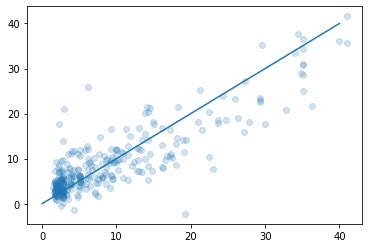

In [212]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 40], [0, 40])

Text(0.5, 1.0, 'LASSO Predicted vs Actual Salary($M), Test Set')

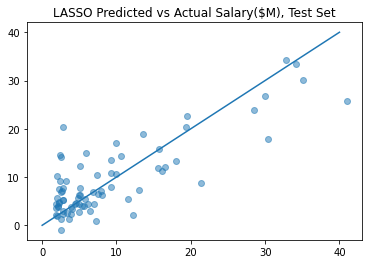

In [213]:
# Fitted vs. Actual Test
y_test_pred = lin_reg_est.predict(X_holdout)

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([0, 40], [0, 40])
plt.title('LASSO Predicted vs Actual Salary($M), Test Set')

Text(0.5, 1.0, 'OLS Predicted vs Actual Salary($M), Test Set')

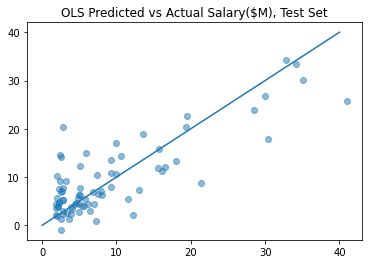

In [214]:
# Fitted vs. Actual Test
y_test_pred = lin_reg_est.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred, alpha=0.5)
plt.plot([0, 40], [0, 40])
plt.title('OLS Predicted vs Actual Salary($M), Test Set')

Text(0.5, 1.0, 'OLS Residuals vs Actual Salary($M), Test Set')

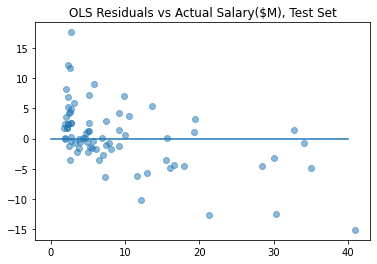

In [215]:
# Plot Residuals vs. predicted

plt.scatter(y_holdout, y_test_pred - y_holdout, alpha=0.5)
plt.plot([0, 40], [0, 0])
plt.title('OLS Residuals vs Actual Salary($M), Test Set')

In [216]:

print('OLS R2 Train', r2_score(y_train, y_train_pred))
print('OLS R2 Test', r2_score(y_holdout, y_test_pred))
print('\n')
print('OLS MAE Test', mae(y_holdout, y_test_pred), '($M)')
print('OLS RMSE Test', np.sqrt(mean_squared_error(y_holdout, y_test_pred)), '($M)')


OLS R2 Train 0.736610775968946
OLS R2 Test 0.6648322578341601


OLS MAE Test 3.710527757807454 ($M)
OLS RMSE Test 5.2519191522377735 ($M)


Lasso Model:


/Users/andrei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218.66180956633207, tolerance: 1.9140739148823436
  model = cd_fast.enet_coordinate_descent(
/Users/andrei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291.9732571765858, tolerance: 2.028343483892686
  model = cd_fast.enet_coordinate_descent(
/Users/andrei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206.60585715980642, tolerance: 1.9674755797160777
  model = cd_fast.enet_coordinate_descent(
/Users/andrei/opt/anaconda3/lib/python3.8/site-packages/sklearn/li

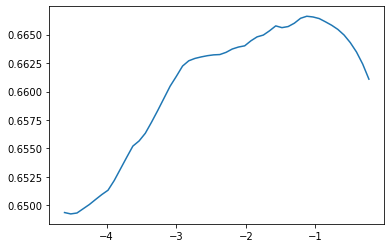

In [109]:
# print("Lasso Model:")
# params = {
#     "alpha": np.logspace(-2, -.1, 50)}

# grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
#                         return_train_score=False)
# grid_est.fit(X_train, y_train)
# df = pd.DataFrame(grid_est.cv_results_)
# df["alpha"] = df.params.apply(lambda val: val["alpha"])
# plt.plot(np.log(df.alpha), df.mean_test_score);

In [110]:
# grid_est.best_estimator_
# # 

Lasso(alpha=0.3252706652846514)

In [111]:
# np.set_printoptions(suppress=True)  # remove scientific notation 
# params['alpha']


array([0.01      , 0.01093391, 0.01195504, 0.01307153, 0.0142923 ,
       0.01562707, 0.0170865 , 0.01868222, 0.02042698, 0.02233467,
       0.02442053, 0.02670119, 0.02919484, 0.03192138, 0.03490255,
       0.03816213, 0.04172614, 0.04562298, 0.04988376, 0.05454246,
       0.05963623, 0.06520572, 0.07129535, 0.0779537 , 0.08523388,
       0.09319396, 0.10189744, 0.11141375, 0.12181879, 0.13319557,
       0.14563485, 0.15923584, 0.17410704, 0.19036707, 0.20814565,
       0.22758459, 0.24883895, 0.27207828, 0.29748796, 0.32527067,
       0.35564803, 0.38886237, 0.42517863, 0.4648865 , 0.50830274,
       0.55577366, 0.60767794, 0.66442961, 0.72648138, 0.79432823])

In [112]:
# def build_grid_search_est(model, X, y, cv=5, **params):

#     grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
#                             return_train_score=False)
#     grid_est.fit(X, y)
#     df = pd.DataFrame(grid_est.cv_results_)
#     for param in params:
#         df[param] = df.params.apply(lambda val: val[param])
# #       plt.plot(np.log(df.alpha), df.mean_test_score);
#         plt.semilogx(df.alpha, df.mean_test_score)
#     return grid_est

Lasso Grid Search


/Users/andrei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218.66180956633207, tolerance: 1.9140739148823436
  model = cd_fast.enet_coordinate_descent(
/Users/andrei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291.9732571765858, tolerance: 2.028343483892686
  model = cd_fast.enet_coordinate_descent(
/Users/andrei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206.60585715980642, tolerance: 1.9674755797160777
  model = cd_fast.enet_coordinate_descent(
/Users/andrei/opt/anaconda3/lib/python3.8/site-packages/sklearn/li

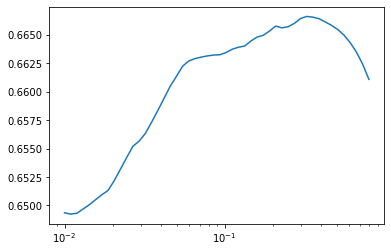

In [113]:
print("Lasso Grid Search")
# lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-2, -0.1, 50))

In [117]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lin_reg_est.predict(X_holdout)
print("Linear Regression:", r2_score(y_holdout, y_pred))

# y_pred = lasso_grid_est.predict(X_holdout)
# print("Lasso Regression:", r2_score(y_holdout, y_pred))

Linear Regression: 0.6648322578341601


##  LASSO CV Regularized

In [194]:
X_train, X_test, y_train, y_test = train_test_split(dfnba[feats], dfnba['Next_Sal'], test_size=0.2, random_state=42)


## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,400)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.14891290324394094

In [195]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('Prev_Sal', 0.7007376985006815),
 ('Age', -0.3001815390788424),
 ('G', 0.3831735833538424),
 ('GS', 1.0257355314972805),
 ('MP', -0.0),
 ('3P', 0.0),
 ('3P%', -0.044642286491475),
 ('FT', 0.0),
 ('TRB', 0.1363639698056294),
 ('AST', 0.694994166300331),
 ('TOV', -1.3368843109486328),
 ('PTS', 0.0),
 ('USG%', -0.16622087285035117),
 ('GS/G', 0.0),
 ('TOV/AST', -0.0536133406418531),
 ('3P%x3P', 0.08545468215885262),
 ('MP_sq', 1.5764165995323995),
 ('PTS_sq', 5.2209026544738455)]

<BarContainer object of 18 artists>

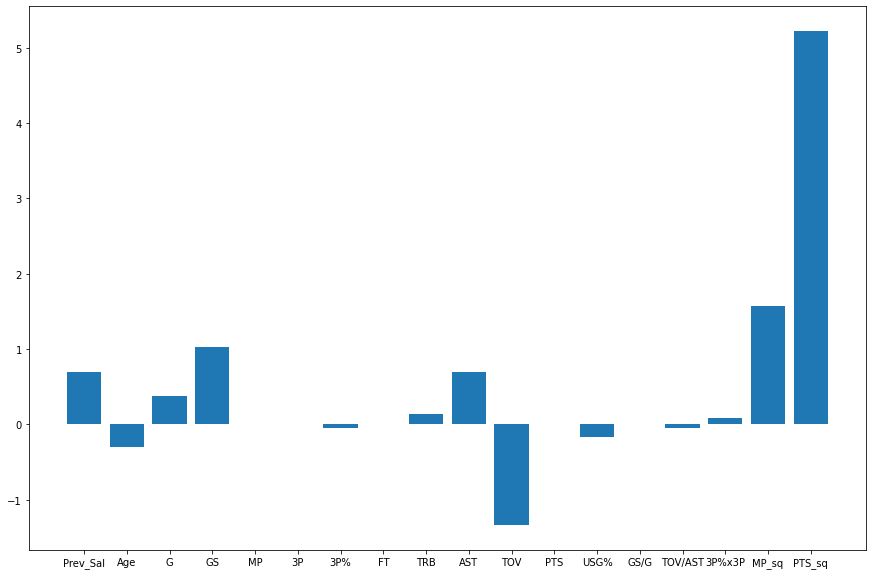

In [196]:
plt.figure(figsize=(15, 10))
plt.bar(X_train.columns, lasso_model.coef_)


In [197]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)
train_set_pred = lasso_model.predict(X_tr)


#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 


print('LASSO R2 Train', r2_score(y_train, train_set_pred))
print('LASSO R2 Test', r2_score(y_test, test_set_pred))
print('\n')
print('LASSO MAE Test', mae(y_test, test_set_pred), '($M)')
print('LASSO RMSE Test', np.sqrt(mean_squared_error(y_test, test_set_pred)), '($M)')

# Find the MAE and R^2 on the test set using this model
# mae(y_test, test_set_pred)

LASSO R2 Train 0.7064959438335627
LASSO R2 Test 0.6405916368164155


LASSO MAE Test 3.7738943842347004 ($M)
LASSO RMSE Test 5.438523561429468 ($M)


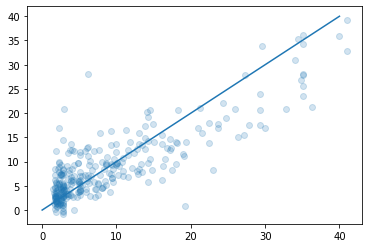

In [173]:
# Fitted vs. Actual Train
y_train_pred = lasso_model.predict(X_tr)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 40], [0, 40])

Text(0.5, 1.0, 'LASSO Predicted vs Actual Salary($M), Test Set')

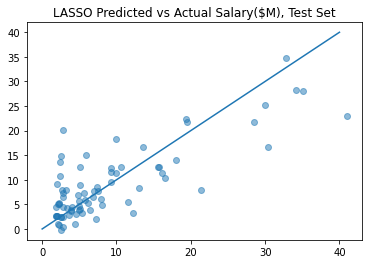

In [198]:
# Fitted vs. Actual Test
y_test_pred = lasso_model.predict(X_te)

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([0, 40], [0, 40])
plt.title('LASSO Predicted vs Actual Salary($M), Test Set')

Text(0.5, 1.0, 'LASSO Residuals vs Actual Salary($M), Test Set')

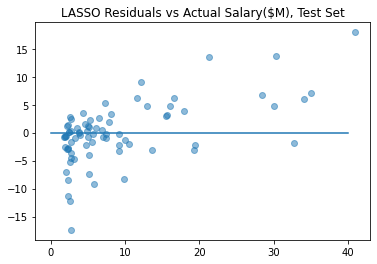

In [199]:
# Plot Residuals vs. predicted

plt.scatter(y_test, y_test - y_test_pred, alpha=0.5)
plt.plot([0, 40], [0, 0])
plt.title('LASSO Residuals vs Actual Salary($M), Test Set')